# US Gap Analysis Project - WV Breeding Bird Atlas Data Comparison

*Nathan Tarr and Jessie Jordan*

## Cover type associations in West Virginia Summarized Across All Species

We investigated the agreement between WV Breeding Bird Atlas (2011-2015) and USGS Gap Analysis Project data

In [1]:
import pandas as pd
import numpy as np
import repo_functions as fun
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 400)
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 15)

In [2]:
# Call species lists and generate empty dataframes-----------------------------
specieslist = (pd.read_csv(fun.dataDir + "/SpeciesLists/WV_GAP_Atlas.csv", 
                           index_col ='strCommonName', header=0))
mastdf = pd.DataFrame(index=[ "Unusable", "Supported validation", 
                                        "Supported addition", 
                                        "Total detections"], 
                             columns=["Species", "detections"])
masteval = pd.DataFrame(index=[ "Unvalidated", "Validated", 
                              "Additions"], columns=["Species", 
                                            "GAP_types"])
allunmatch = []

# Load land cover crosswalk - slow loading for some reason
cross = pd.read_csv(fun.dataDir + "LandCover/land_cover_crosswalk.csv", 
                    header=0, dtype={'GAP_code': str}) 


In [3]:
for species in specieslist.index[0:] :
    try:
        # Perform crosswalk of detections from WV -> USGAP
        master, GAP_linked, unmatched, gap_types, wv_types = fun.cross_to_GAP(species, 
                                                    cross, print_tables=False)
        
        master_valid = master[master['evaluation'] == 'valid']
        master_add = master[master['evaluation'] == 'add_association']
        usable_df = pd.DataFrame(index=[ "Unusable", "Supported validation", 
                                        "Supported addition", 
                                        "Total detections"], 
                             columns=["detections"])
        usable_df.loc['Supported validation', 
                      'detections'] = int(master_valid[['detections']].sum())
        usable_df.loc['Supported addition', 
                      'detections'] = int(master_add[['detections']].sum())
        usable_df.loc['Unusable', 
                      'detections'] = int(wv_types['detections'].sum() - 
                                          master_valid[['detections']].sum() - 
                                          master_add[['detections']].sum())
        usable_df.loc['Total detections', 
                      'detections'] = wv_types['detections'].sum()
        usable_df.insert(0, "Species", species, True)
        usable_df = usable_df.fillna(0)
        mastdf = pd.concat([usable_df, mastdf])
        
        # Aggregate results for proportion of GAP systems validated------------
        eval_df = pd.DataFrame(index=[ "Unvalidated", "Validated", 
                                      "Additions"], columns=["GAP_types"])
        eval_df.loc['Unvalidated', "GAP_types"] = len(gap_types) - len(master_valid)
        eval_df.loc['Validated', "GAP_types"] = len(master_valid)
        eval_df.loc['Additions', "GAP_types"] = len(master_add)
        eval_df.insert(0, "Species", species, True)
        eval_df = eval_df.fillna(0)
        masteval = pd.concat([eval_df, masteval])
        print(species + " add successful")
        
        #Generate a full list of unmatched habitat types across all species
        allunmatch.append(unmatched)
    except Exception as e: 
            print(str("Concatonate failed for ") + species)  


0 of 0 GAP ecological system associations were validated.
American Kestrel add successful
Concatonate failed for Bewick's Wren
0 of 0 GAP ecological system associations were validated.
Blue Grosbeak add successful
3 of 40 GAP ecological system associations were validated.
Common Grackle add successful
5 of 33 GAP ecological system associations were validated.
Common Yellowthroat add successful
0 of 0 GAP ecological system associations were validated.
Double-crested Cormorant add successful
Concatonate failed for Hooded Merganser
1 of 24 GAP ecological system associations were validated.
House Wren add successful
Concatonate failed for King Rail
0 of 0 GAP ecological system associations were validated.
Northern Waterthrush add successful
Concatonate failed for Prothonotary Warbler
0 of 0 GAP ecological system associations were validated.
Purple Martin add successful
0 of 7 GAP ecological system associations were validated.
Red-breasted Nuthatch add successful
Concatonate failed for Ruby

0 of 0 GAP ecological system associations were validated.
Mourning Warbler add successful
Concatonate failed for Northern Pintail
3 of 22 GAP ecological system associations were validated.
Northern Rough-winged Swallow add successful
1 of 19 GAP ecological system associations were validated.
Ovenbird add successful
Concatonate failed for Pine Siskin
3 of 36 GAP ecological system associations were validated.
Pileated Woodpecker add successful
1 of 36 GAP ecological system associations were validated.
Ruby-throated Hummingbird add successful
Concatonate failed for Snow Bunting
4 of 43 GAP ecological system associations were validated.
Tufted Titmouse add successful
0 of 0 GAP ecological system associations were validated.
Virginia Rail add successful
0 of 28 GAP ecological system associations were validated.
Warbling Vireo add successful
2 of 37 GAP ecological system associations were validated.
Wild Turkey add successful
1 of 15 GAP ecological system associations were validated.
Winter 

In [6]:
#Convert list of dictionaraies to an organized dataframe
df = pd.DataFrame(allunmatch)

#Find the sum and count of occurances records for each mismatched code
undf = pd.DataFrame(index = df.T.index, columns = ['Unmatched Observations', 'Number of spp with Record'])
undf['Unmatched Observations'] = df.T.sum(axis=1)
undf['Number of spp with Record'] = df.T.count(axis=1)
print(undf[['Unmatched Observations', 'Number of spp with Record']])
unobvs = undf['Unmatched Observations'].T.sum(axis=0)

#Sum all unmatched occurances for each species and find the average
sumspp = df.sum(axis=1)
avgun = sumspp.mean(axis=0)

print("Average number of unusable records per species due to incorrect or other data entry: " + str(avgun))
print("Total Unmatched observations due to incorrect or other code entry: " + str(unobvs)) 


     Unmatched Observations  Number of spp with Record
32                    745.0                         71
,                       1.0                          1
32b                     2.0                          2
68                      4.0                          2
32a                     4.0                          3
e                       2.0                          1
u                       5.0                          3
39                      1.0                          1
j                       1.0                          1
176                     3.0                          1
f                       3.0                          2
Average number of unusable records per species due to incorrect or other data entry: 5.546762589928058
Total Unmatched observations due to incorrect or other code entry: 771.0


                     Species-Habitat Detections                   
                                          Count     Average  Total
Supported addition                           46   22.215827   3088
Supported validation                         63   38.913669   5409
Total detections                            106  287.129496  39911
Unusable                                    102  226.000000  31414


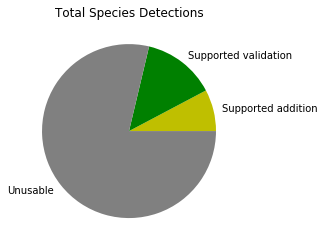

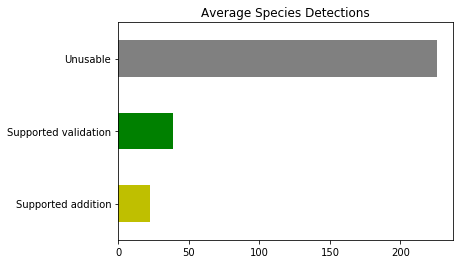

In [7]:
#Clean up master tables to create pivot tables
mastdf = mastdf.dropna()
masteval = masteval.dropna().astype({'GAP_types': 'int32'})

#Create pivot table summarizing the validity of WVBBA habitat detections
pivdf = mastdf.pivot_table(index = mastdf.index,
                           aggfunc = {'detections' : [ np.mean, sum, lambda x: len(x.unique())]},
                           fill_value = 0).sort_index()
pivdf.rename(columns={"detections" : "Species-Habitat Detections", 
                      "mean" : "Average", "sum" : "Total", "<lambda_0>" : "Count"}, inplace=True) 

#Display Table and plot pie chart of total detections
print(pivdf)
plt1 = pivdf.drop(['Total detections']).plot(y=('Species-Habitat Detections',        'Total'), 
                                             kind='pie',
                                             legend=False, 
                                             title = "Total Species Detections",
                                             colors=['y', 'g', 'gray'])
plt1.set_ylabel("")
plt2 = pivdf.drop(['Total detections']).plot.barh(x= None, y=('Species-Habitat Detections',        'Average'), 
                                                  color=['y', 'g', 'gray'], legend=False, title = "Average Species Detections")   

            GAP Systems Validated by WVBBA                 
                                     Count    Average Total
Additions                                7   1.676259   233
Unvalidated                             47  18.345324  2550
Validated                                8   1.755396   244


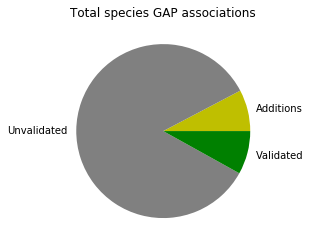

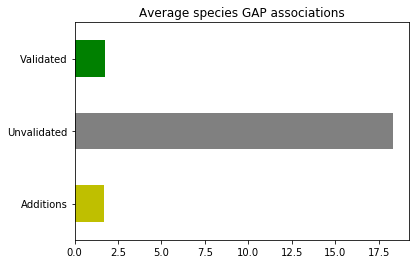

In [8]:
#Create pivot table summarizing the proportion of GAP systems validated 
piveval = masteval.pivot_table(index = masteval.index,
                           aggfunc = {'GAP_types' : [np.mean, sum, lambda x: len(x.unique())]},
                           fill_value = 0).sort_index()
piveval.rename(columns={"GAP_types" : "GAP Systems Validated by WVBBA", "mean" : "Average", 
                        "sum" : "Total", "<lambda_0>" : "Count"}, inplace=True)

#Display data table and plot tables of the sum of validated GAP associations and the average per species
print(piveval)
plt3 = piveval.plot(y=('GAP Systems Validated by WVBBA',        'Total'), 
                                             kind='pie',
                                             legend=False, 
                                             title = "Total species GAP associations",
                                             colors=['y', 'gray', 'g'])
plt3.set_ylabel("")
plt4 = piveval.plot.barh(x = None, y=('GAP Systems Validated by WVBBA',        'Average'), 
                         color=['y', 'gray', 'g'],
                         legend=False, title = "Average species GAP associations") 